In [3]:
import pandas as pd
from patsy import dmatrix
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False

In [19]:
import statsmodels.api as sm
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
dfx0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfx = sm.add_constant(dfx0)
dfy = pd.DataFrame(diabetes.target, columns=['result'])

model_diabetes = sm.OLS(dfy, dfx)
result_diabetes = model_diabetes.fit()

In [20]:
print(result_diabetes.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           3.83e-62
Time:                        16:18:24   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In [28]:
result_diabetes.params

const    152.133484
age      -10.012198
sex     -239.819089
bmi      519.839787
bp       324.390428
s1      -792.184162
s2       476.745838
s3       101.044570
s4       177.064176
s5       751.279321
s6        67.625386
dtype: float64

In [41]:
w = [0 for _ in range(len(result_diabetes.params))]

In [42]:
feature = diabetes.feature_names
feature.insert(0, 'const')
feature

['const',
 'const',
 'age',
 'sex',
 'bmi',
 'bp',
 's1',
 's2',
 's3',
 's4',
 's5',
 's6']

In [43]:
for i, param in enumerate(result_diabetes.params):
     w[i] = (diabetes.feature_names[i], round(param, 2))
w

[('const', 152.13),
 ('const', -10.01),
 ('age', -239.82),
 ('sex', 519.84),
 ('bmi', 324.39),
 ('bp', -792.18),
 ('s1', 476.75),
 ('s2', 101.04),
 ('s3', 177.06),
 ('s4', 751.28),
 ('s5', 67.63)]

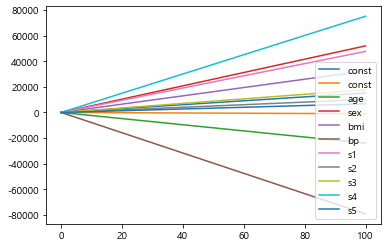

In [44]:
xx = np.linspace(0, 100, 1000)
for w in w:
    plt.plot(xx, w[1]*xx)

plt.legend(feature)
plt.show()

In [46]:
# 정석적인 방법

diabetes = load_diabetes()
dfx = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfy = pd.DataFrame(diabetes.target, columns=['result'])
df = pd.concat([dfx, dfy], axis=1)

model_diabetes = sm.OLS.from_formula("result ~" + "+".join(diabetes.feature_names), data=df)
result_diabetes = model_diabetes.fit()

In [47]:
result_diabetes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           3.83e-62
Time:                        16:30:18   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""